In [1]:
import numpy as np; import pandas as pd; import seaborn as sns

In [2]:
# Opening the data and taking a seank peak at it.

open('example.txt').readlines()[:1]

['{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n']

So the data is in JSON (JavaScript Object Notation) form.

For dealing with the JSON data, we have in-built json module in python. Which can convert the JSON object to Python String Object.

In [3]:
import json

string_objects = [json.loads(line) for line in open('example.txt')]

Now we can convert this Python string object into pandas's DataFrame.

In [4]:
frame = pd.DataFrame(string_objects)

In [5]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

As we can see that we have missing data as well here, let's deal with it.

In [6]:
frame['tz'].notnull().value_counts()

True     3440
False     120
Name: tz, dtype: int64

We have 120 missing values in `tz` column.

In [7]:
cleaned_tz = frame['tz'].fillna('Missing')

Let's plot the time zone on value counts only.

In [8]:
tz_counts = cleaned_tz.value_counts()

In [9]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

We can see that we have filled the missing data but there is no index value to it, let's assign one.

In [10]:
cleaned_tz[cleaned_tz == ''] = 'Unknown'

In [11]:
tz_counts = cleaned_tz.value_counts()

In [12]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

Perfect! Now we have "Unknown" index name for missing data. We can plot the time zone now with the help of seaborn.

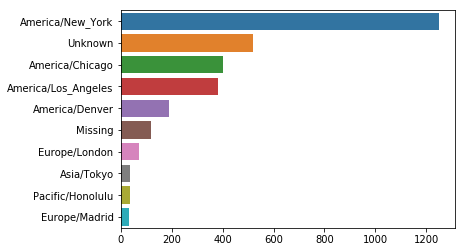

In [13]:
sns.barplot(x = tz_counts.values[:10], y=tz_counts.index[:10])

Now is the time to deal with the operating system part.

First we will be needing to differentiate between **Windows and Non-Windows** Operating systems.

In [14]:
frame['a'][:10]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

As we can see that first value of column a which is string contains the information about the operating system.

In [15]:
# Making pandas Series object for exctrating the name of operating systems from the dataframe.
results = pd.Series(x.split()[0] for x in frame['a'].dropna())

In [16]:
results.notnull().value_counts()

True    3440
dtype: int64

In [17]:
frame['a'].notnull().value_counts()

True     3440
False     120
Name: a, dtype: int64

Let's deal with the missing values.

In [18]:
cleaned_frame = frame[frame['a'].notnull()]

In [19]:
cleaned_frame['a'].notnull().value_counts()

True    3440
Name: a, dtype: int64

In [20]:
results[:10]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

Making a column named 'os' where we will be having two categories for **Windows and Non-Windows** operating systems.

In [21]:
cleaned_frame.is_copy = False
cleaned_frame['os'] = np.where(cleaned_frame['a'].str.contains('Windows'),
                              'Windows', 'Not Windows')

c:\users\rockstar\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
c:\users\rockstar\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


Now group the dataframe with 'os' and 'tz'.

In [22]:
group_tz_os = cleaned_frame.groupby(['tz', 'os'])

In [23]:
group_tz_os.size()

tz                              os         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

In [24]:
group_tz_os.size().unstack()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,NaN,3.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,NaN,2.0
Africa/Johannesburg,NaN,1.0
Africa/Lusaka,NaN,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,NaN
America/Argentina/Cordoba,NaN,1.0


So we have missing values as well in it, which we need to handle.

In [25]:
agg_counts = group_tz_os.size().unstack().fillna(0)

In [26]:
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [27]:
agg_counts.sum(1)

tz
                                   521.0
Africa/Cairo                         3.0
Africa/Casablanca                    1.0
Africa/Ceuta                         2.0
Africa/Johannesburg                  1.0
Africa/Lusaka                        1.0
America/Anchorage                    5.0
America/Argentina/Buenos_Aires       1.0
America/Argentina/Cordoba            1.0
America/Argentina/Mendoza            1.0
America/Bogota                       3.0
America/Caracas                      1.0
America/Chicago                    400.0
America/Chihuahua                    2.0
America/Costa_Rica                   1.0
America/Denver                     191.0
America/Edmonton                     6.0
America/Guayaquil                    2.0
America/Halifax                      4.0
America/Indianapolis                20.0
America/La_Paz                       1.0
America/Lima                         1.0
America/Los_Angeles                382.0
America/Managua                      3.0
America/Mazat

we need to sort this data.

In [28]:
indexer = agg_counts.sum(1).argsort()

Taking a subset :

In [29]:
count_subset = agg_counts.take(indexer[-10:])

In [30]:
count_subset.head()

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0


Now we need a `total` column, so that we can seperate the values of windows and non-windows os.

For that we need to stack the dataframe and then add another column named 'total'

In [31]:
count_subset = count_subset.stack()

In [32]:
count_subset.name = 'total'

In [33]:
count_subset = count_subset.reset_index()

In [34]:
count_subset.head()

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0


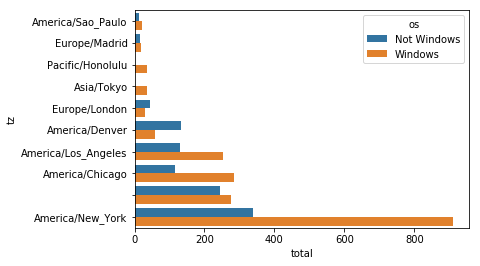

In [35]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

We need relative percentage for each comparision.

In [40]:
def norm_total(group):
    group['normal_total'] = group.total/group.total.sum()
    return group

In [41]:
results = count_subset.groupby('tz').apply(norm_total)

In [46]:
results.head()

,tz,os,total,normal_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000


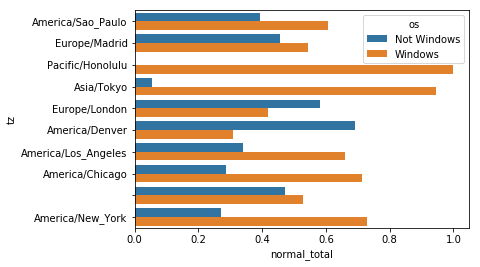

In [42]:
sns.barplot(x='normal_total', y='tz', hue='os', data=results)